#### API key

In [2]:
from nixtlats import NixtlaClient
from dotenv import load_dotenv
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

# checking if the API key is valid
nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

#### Loading data

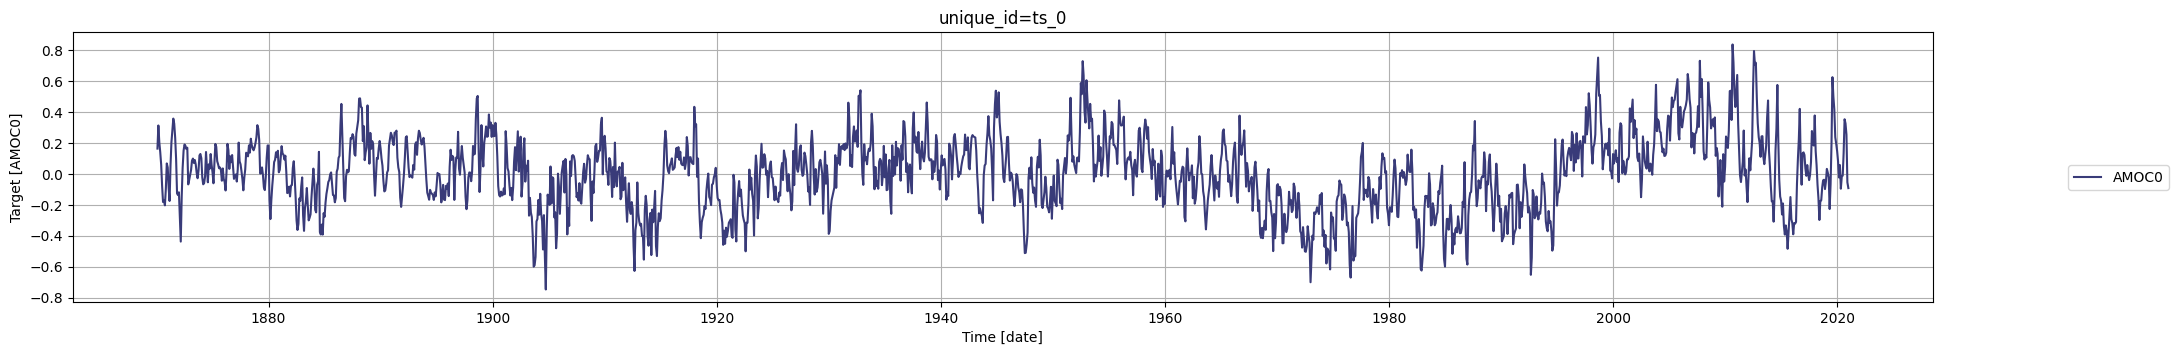

In [3]:
import pandas as pd 

all_data = pd.read_csv(os.path.join('..','data','climate','AMOCdata.csv'))

# plotting all data
nixtla_client.plot(all_data, time_col='date', target_col='AMOC0')

"In the context of monthly data, a period exceeding two years would typically be classified as long-horizon forecasting." URL: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon

* **df**: A pandas dataframe containing the time series data.
* **h**: The number of steps ahead to forecast (in this case in months (MS = month start)).
* **freq**: The frequency of the time series in Pandas format. See pandas’ available frequencies (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
* **time_col**: Column that identifies the datestamp column.
* **target_col**: The variable that we want to forecast.

forecasting the next 12 months using the SDK forecast method:

#### Functions

In [11]:
import pandas as pd

dataset = all_data
train_size = 1000
test_size = 250
horizon = 50
model_type = 'timegpt-1-long-horizon' # 'timegpt-1' or 'timegpt-1-long-horizon'
target_column = 'AMOC0'
time_column = 'date'
freqency = 'MS' # month start frequency

def rolling_origin_forecast(train_size, test_size, horizon, dataset, time_column, target_column, freqency, model_type):
    all_predictions = []
    for start in range(train_size, (train_size+test_size) - horizon + 1):
        train_df = dataset.iloc[:start]

        # Predict the next 10 rows
        forecast_df = nixtla_client.forecast(
            df=train_df,
            h=horizon,
            time_col=time_column,
            target_col=target_column,
            freq=freqency,
            model=model_type,
        )

        # get the actual values for the prediction window
        actual_df = dataset.iloc[start:start + horizon][[time_column, target_column]]

        # Concatenate the actual and prediction dataframes
        results = forecast_df.copy()
        results['Actual'] = actual_df[target_column].values

        # Save the results in the list
        all_predictions.append(results)
    
    return all_predictions

results = rolling_origin_forecast(train_size, test_size, horizon, dataset, time_column, target_column, freqency, model_type)

results_df = pd.concat(results)
results_df['RollingOrigin'] = [i for i in range(len(results)) for _ in range(horizon)]

# save the results
results_df.to_csv(os.path.join('results', 'climate_data', f'train_{train_size}_test_{test_size}_horizon_{horizon}_modeltype_{model_type}_climate_results.csv'), index=False)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...
INFO:nixtlats.nixtla_client:

More functionalities to look into:

1. Forecasting on long horizon: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon
2. Prediction intervals, how uncertain is prediction "a prediction interval gives an estimated range within which a future observation will fall": https://docs.nixtla.io/docs/prediction_intervals
3. forecasting on irregular timestamps: https://docs.nixtla.io/docs/forecasting_time_series_with_irregular_timestamps
4. Cross validation: https://docs.nixtla.io/docs/cross_validation